# Step 1. Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
# from utility import check_missing_value

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Step 2. Import Data

In [2]:
# read data into a DataFrame

df = pd.read_csv('Advertising.csv', index_col=0)
df.head(15)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


# Step 3. Data Analysis

In [3]:
print(df.dtypes)

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object


In [4]:
print(df.shape)

(200, 4)


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# check outliers

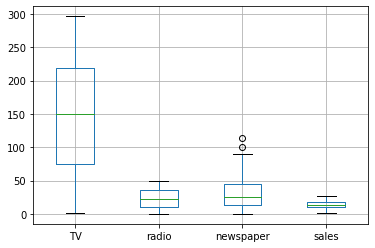

In [6]:
df.boxplot() # we box polot only for continuous numeric data

in data frame we have all the varaibles in continous numeric values so we
create box plot on all columns by this plot we can se there is no outlier in
tv radio but newspaper contain two outliers

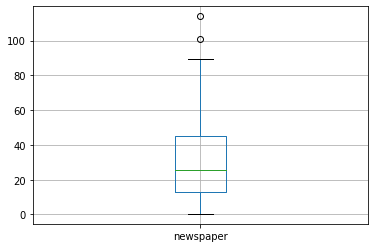

In [7]:
df.boxplot(column="newspaper")

In [8]:
# above we have 2 outliers they could have been dropped but they are equally important for this model

# we can drop outliers this way
a=df[df["newspaper"]>=100]
df.drop([17,102],inplace=True)



In [9]:
def check_missing_value(data):
    """
    Objective: Check missing value count and percentage in all columns

    data: input data frame
    return: Missing value data frame

    """
    total = data.isnull().sum().sort_values(ascending=False)
    percent= (data.isnull().sum()/data.isnull().count()  * 100).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    return missing_data

In [10]:
miss = check_missing_value(df)
miss

,Total,Percent
sales,0,0.0
newspaper,0,0.0
radio,0,0.0
TV,0,0.0


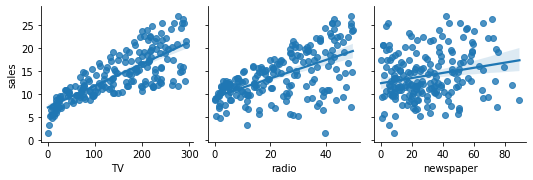

In [11]:
sns.pairplot(df,
             x_vars=["TV","radio","newspaper"],
             y_vars="sales",
             kind='reg')

plt.show()

In [12]:
feature_cols = ['TV', 'radio', 'newspaper']
X = df[feature_cols]
y = df.sales

In [13]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [14]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [15]:
# Check the distribution of y

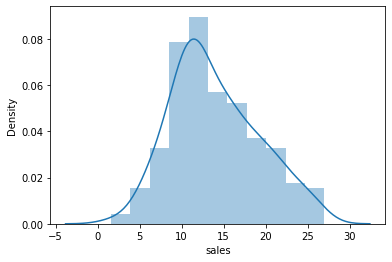

In [16]:
sns.distplot(y, hist=True)
plt.show()

SALE Variable is meeting the assumption and we can see the approximate normal Distribution

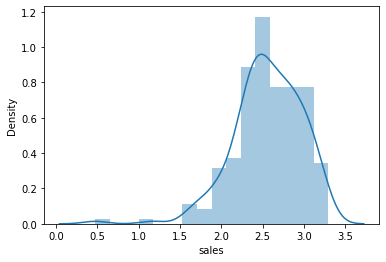

In [17]:
#### you can use this code to convert into log transformation
Y_log = np.log(y)
sns.distplot(Y_log, hist=True)

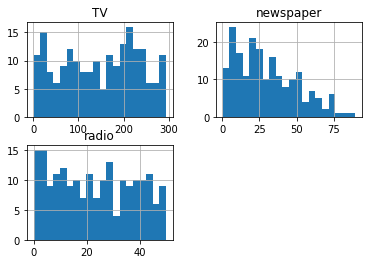

In [18]:
# check hist for all variables
X.hist(bins=20)
plt.show()

In [19]:
data_num_skew = X.apply(lambda x: skew(x.dropna()))
data_num_skewed = data_num_skew[(data_num_skew > 0.75) | (data_num_skew < -0.75)]

print(data_num_skew)
print(data_num_skewed)

TV          -0.081707
radio        0.113970
newspaper    0.645176
dtype: float64
Series([], dtype: float64)


In [20]:
# apply log + 1 transformation for all numeric featreus with Skewness over 0.75

X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

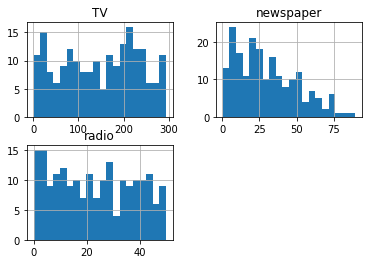

In [21]:
# check hist for all variables after log transform of newspaper
X.hist(bins=20)
plt.show()

In [22]:
# Checking colinearity

corr_df = X.corr(method="pearson")
print(corr_df)

                 TV     radio  newspaper
TV         1.000000  0.051978   0.049771
radio      0.051978  1.000000   0.346364
newspaper  0.049771  0.346364   1.000000


# Check VIF

- Sometimes the correlation matrix alone will not help you to check the multicolinearity so you can use VIF

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,2.50
1,radio,3.28
2,newspaper,3.13


In [24]:
from sklearn.model_selection import train_test_split

# > 1000 --> TEST SIZE = 0.3
# < 1000 --> TEST SIZE = 0.2

#Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=10)

In [25]:
df.shape

(198, 4)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(158, 3)
(158,)
(40, 3)
(40,)


In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)


In [28]:
X_train

,TV,radio,newspaper
191,39.5,41.1,5.8
8,120.2,19.6,11.6
28,240.1,16.7,22.9
139,43.0,25.9,20.5
60,210.7,29.5,9.3
...,...,...,...
116,75.1,35.0,52.7
66,69.0,9.3,0.9
16,195.4,47.7,52.9
128,80.2,0.0,9.2


In [29]:
X_train_scale

array([[0.12227979, 0.82862903, 0.0617284 ],
       [0.40103627, 0.39516129, 0.12682379],
       [0.81519862, 0.33669355, 0.25364759],
       [0.1343696 , 0.52217742, 0.22671156],
       [0.71364421, 0.59475806, 0.1010101 ],
       [0.4328152 , 0.11491935, 0.34792368],
       [0.80863558, 0.69153226, 0.05611672],
       [0.78756477, 0.1733871 , 0.09427609],
       [0.45630397, 0.38709677, 0.18294052],
       [0.24594128, 0.40927419, 0.36139169],
       [0.89395509, 0.07056452, 0.21548822],
       [0.07253886, 0.51814516, 0.48260382],
       [0.94231434, 0.9858871 , 0.4657688 ],
       [0.23937824, 0.34274194, 0.14141414],
       [0.03143351, 0.32056452, 0.55331089],
       [0.88842832, 0.8608871 , 0.61054994],
       [0.75405872, 0.08669355, 0.55555556],
       [0.36511226, 0.28830645, 0.35241302],
       [0.63488774, 0.34677419, 0.19753086],
       [0.67599309, 0.0625    , 0.38496072],
       [0.05284974, 0.32258065, 0.24691358],
       [0.46217617, 0.93548387, 0.65881033],
       [0.

In [30]:
from sklearn.linear_model import LinearRegression

# creat a model object
lm = LinearRegression()

# train the model object
lm.fit(X_train_scale, y_train)

LinearRegression()

In [31]:
y_pred=lm.predict(X_test_scale)
print(y_pred)

[ 5.81196152 13.15777516 14.55999123 16.69782198 20.29903033 18.2180512
 14.96631713  8.95008742 17.92429691 12.93493198  7.10928558  7.12345018
  4.58234743 17.54679271 15.74437291 17.32092427 12.34832249  9.70503063
  8.20124107 12.46682331 18.22822012 10.90209645 16.70467352 13.22264367
 11.11705445  8.51101814 11.88517331 12.81403747 16.25015901  7.88872253
  4.63158079 16.42627172 14.00982842  4.62278715 23.50192151 12.03884611
 23.94201719 17.70591101 21.86563011 13.55058539]


In [32]:
r2=r2_score(y_test,y_pred)
print("R Square: ", r2)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R Square: ", adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: ", rmse)

R Square:  0.7847276428213541
Adjusted R Square:  0.7813986888443647
RMSE:  2.5440647933859015


In [33]:
print (lm.intercept_)
print(list(zip(feature_cols, lm.coef_)))

3.2118269525797043
[('TV', 12.80299298944288), ('radio', 9.810691754853668), ('newspaper', 0.0838292494434798)]


In [34]:
new_df = pd.DataFrame()
new_df = X_test

new_df["Actual Sales"] = y_test
new_df["Predicted Sales"] = y_pred
new_df

,TV,radio,newspaper,Actual Sales,Predicted Sales
61,53.5,2.0,21.4,8.1,5.811962
6,8.7,48.9,75.0,7.2,13.157775
22,237.4,5.1,23.5,12.5,14.559991
195,149.7,35.6,6.0,17.3,16.697822
54,182.6,46.2,58.7,21.2,20.299030
21,218.4,27.7,53.4,18.0,18.218051
163,188.4,18.1,25.6,14.9,14.966317
57,7.3,28.1,41.4,5.5,8.950087
71,199.1,30.6,38.7,18.3,17.924297
3,17.2,45.9,69.3,9.3,12.934932


In [35]:
new_df["Deviation"] = new_df["Actual Sales"] - new_df["Predicted Sales"]
new_df.to_csv("Advertising_Pred.csv", header=True, index=False)
new_df.head()

,TV,radio,newspaper,Actual Sales,Predicted Sales,Deviation
61,53.5,2.0,21.4,8.1,5.811962,2.288038
6,8.7,48.9,75.0,7.2,13.157775,-5.957775
22,237.4,5.1,23.5,12.5,14.559991,-2.059991
195,149.7,35.6,6.0,17.3,16.697822,0.602178
54,182.6,46.2,58.7,21.2,20.299030,0.900970


In [37]:
import gradio as gr

#train your Linear Regression model
lm = LinearRegression()
lm.fit(X_train_scale, y_train)

# Define prediction function
def predict_sales(tv, radio, newspaper):
    # Scale the input features
    input_features = scaler.transform([[tv, radio, newspaper]])
    # Predict sales
    prediction = lm.predict(input_features)
    return prediction[0]


# Create Gradio Interface
tv_input = gr.Number(label="TV")
radio_input = gr.Number(label="Radio")
newspaper_input = gr.Number(label="Newspaper")
output_text = gr.Textbox(label="Predicted Sales")

gr.Interface(fn=predict_sales,
             inputs=[tv_input, radio_input, newspaper_input],
             outputs=output_text,
             title="Sales Prediction",
             description="Enter advertising expenses to predict sales").launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
